# Pymaceuticals Inc.
---

### Analysis

1. The correlation between mouse weight and the average tumor volume is 84%. Based on this data, we can determine that as the mouse weight increases so does the tumor volume/mass.
2. As with the correlation results, the regression line analysis shows a positive slow showing displaying that average tumor mass/weight changes as the mouse weight changes.  The data analysis shows that 70% of the model fits the data.
3. Based on the visual data from the summary statisics tables and the box plot, we can determine that Capomulin and Ramicane drug regimens have a higher success rate at reducing the tumor size in the mouse test subjects.
4. The pie chart data refects a fairly even split between genders in the mouse test subjects.
5. The bar charts show that Capomulin and Ramicane drug regimens have the highest number of mouse test subjects.

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = "outer", on = "Mouse ID")
#duplicate_data = combined_data["Mouse ID"].count()

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [105]:
# Checking the number of mice.
total_mice = len(combined_data["Mouse ID"].unique())
print(f"Total number of mice in the study: {total_mice}")


Total number of mice in the study: 249


In [106]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(f"Duplicate Mice ID: {duplicate_mice_id}")

Duplicate Mice ID: ['g989']


In [107]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_list = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_list
#duplicate_mice_list = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep = False)]
#print(duplicate_mice_list[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mice_data = combined_data.drop_duplicates(subset = ("Mouse ID", "Timepoint"), keep = "last")
#drop_dup_count = drop_dup_mice_data.drop_duplicates(subset = ("Mouse ID", "Timepoint"))
#clean_data = len(drop_dup_count["Mouse ID"].unique())

#drop_dup_mice_data
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_id)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [109]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_data["Mouse ID"].nunique()

clean_mice_data

248

## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_data = drop_dup_mice_data.groupby("Drug Regimen")
average_tumor_calc = round(regimen_data["Tumor Volume (mm3)"].mean(),2)
median_tumor_calc = round(regimen_data["Tumor Volume (mm3)"].median(),2)
variance_tumor_calc = round(regimen_data["Tumor Volume (mm3)"].var(),2)
stand_dev_tumor_calc = round(regimen_data["Tumor Volume (mm3)"].std(),2)
sem_tumor_calc = round(regimen_data["Tumor Volume (mm3)"].sem(),2)

summary_tumor_df = pd.DataFrame({"Mean Tumor Volume" : average_tumor_calc, "Median Tumor Volume" : median_tumor_calc,
                                "Tumor Volume Variance" : variance_tumor_calc, "Tumor Volume Std. Dev." : stand_dev_tumor_calc,
                                "Tumor Volume Std. Err." : sem_tumor_calc})
summary_tumor_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_tumor_by_vol_data = combined_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
#summary_tumor_by_vol_data = summary_tumor_by_vol_data.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
#                                                "std": "Standard Deviation", "sem": "SEM"})
summary_tumor_by_vol_data

/var/folders/hq/417ksjz55t33yv_l6fw4xsfw0000gp/T/ipykernel_39561/1074884722.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_tumor_by_vol_data = combined_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

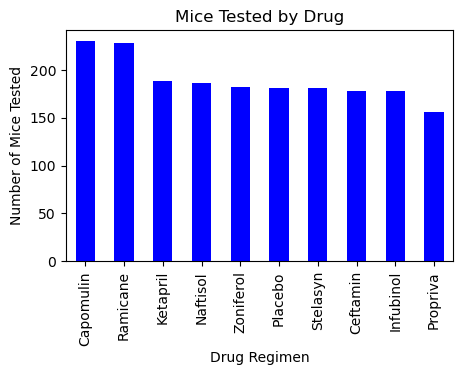

In [112]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
comb_mice_regimen = drop_dup_mice_data.groupby("Drug Regimen")

pandas_bar_comb_info = comb_mice_regimen["Timepoint"].count().sort_values(ascending = False)
pandas_bar_comb = pandas_bar_comb_info.plot(kind = "bar", color = "blue", figsize = (5,3))
pandas_bar_comb.set_title("Mice Tested by Drug")
pandas_bar_comb.set_xlabel("Drug Regimen")
pandas_bar_comb.set_ylabel("Number of Mice Tested")
plt.show()


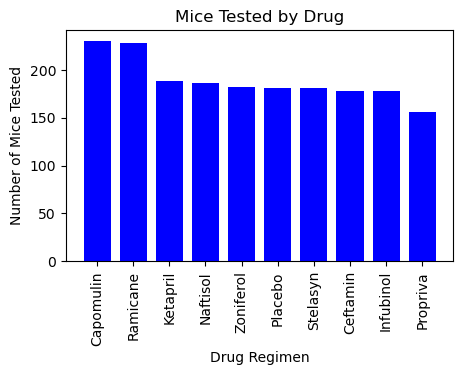

In [113]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(pandas_bar_comb_info))
tick_locations = [value for value in x_axis]

plt.figure(figsize = (5,3))
plt.bar(x_axis, pandas_bar_comb_info, color="blue", width = .75)
plt.xticks(tick_locations, pandas_bar_comb_info.index, rotation="vertical")
plt.title("Mice Tested by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
#plt.tight_layout()


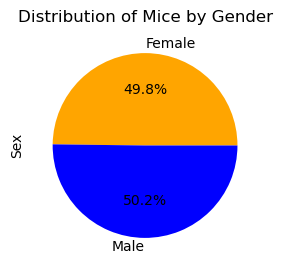

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_data = drop_dup_mice_data.groupby("Sex")

pandas_pie_comb = mice_gender_data["Mouse ID"].nunique()
pandas_pie_chart = pandas_pie_comb.plot(kind = "pie", y = pandas_pie_comb, colors = {"orange", "blue"}, autopct="%1.1f%%", figsize = (3,3))
pandas_pie_chart.set_title("Distribution of Mice by Gender")
pandas_pie_chart.set_ylabel("Sex")
plt.show()


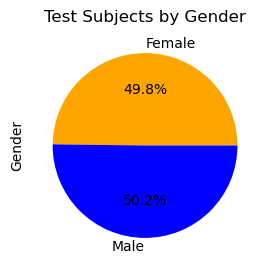

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_gender = pandas_pie_comb.index
colors = ["orange", "blue"]
plt.figure(figsize = (3,3))
plt.pie(pandas_pie_comb, labels = pie_gender, colors=colors, autopct="%1.1f%%")
plt.title("Test Subjects by Gender")
plt.ylabel("Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]
infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]


In [117]:
final_capomulin = capomulin_data.groupby('Mouse ID').max()['Timepoint']
volume_capomulin = pd.DataFrame(final_capomulin)
capomulin_merge_data = pd.merge(volume_capomulin, clean_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [118]:
final_ceftamin = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
volume_ceftamin = pd.DataFrame(final_ceftamin)
ceftamin_merge_data = pd.merge(volume_ceftamin, clean_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [119]:
final_infubinol = infubinol_data.groupby('Mouse ID').max()['Timepoint']
volume_infubinol = pd.DataFrame(final_infubinol)
infubinol_merge_data = pd.merge(volume_infubinol, clean_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [120]:
final_ramicane = ramicane_data.groupby('Mouse ID').max()['Timepoint']
volume_ramicane = pd.DataFrame(final_ramicane)
ramicane_merge_data = pd.merge(volume_ramicane, clean_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [121]:
## Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_last_timepoint = last_timepoint.merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")
merged_last_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [133]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(treatments)]
#lambda functon researched from realpython.com
last_great_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe (using stack also researched from realpython.com)
last_great_timepoint = last_great_timepoint.stack(level=0).unstack(level=0)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds 
drug_count = 0

for drug in treatments:
    quartiles = last_great_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    if drug_count == 0:
        print(f"**********************************************")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"**********************************************")
    treatment+=1


**********************************************
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
**********************************************
**********************************************
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
**********************************************
**********************************************
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol out

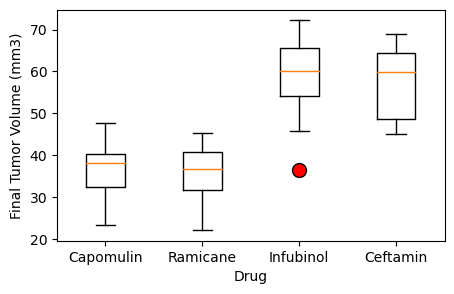

In [130]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin_tumors = capomulin_merge_data["Tumor Volume (mm3)"]
ramicane_tumors = ramicane_merge_data["Tumor Volume (mm3)"]
infubinol_tumors = infubinol_merge_data["Tumor Volume (mm3)"]
ceftamin_tumors = ceftamin_merge_data["Tumor Volume (mm3)"]

plot_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]

red_circle = dict(markerfacecolor = "red", marker = "o", markersize = 10, markeredgecolor = 'black')
fig1, mouseboxplot = plt.subplots(figsize=(5,3))
mouseboxplot.boxplot(plot_data, labels=treatments, widths = 0.4, vert=True, 
                                flierprops = red_circle,)
plt.xlabel("Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [124]:
Capomulin_Tests = drop_dup_mice_data.loc[drop_dup_mice_data["Drug Regimen"] == "Capomulin"]

Potential_Mouse_List = Capomulin_Tests[["Mouse ID"]].drop_duplicates(subset = "Mouse ID", keep = "last")

#print(f"Below is a list of potential mice for the line plot.\n\n{Potential_Mouse_List}")

Text(0, 0.5, 'Tumor Volume (mm3)')

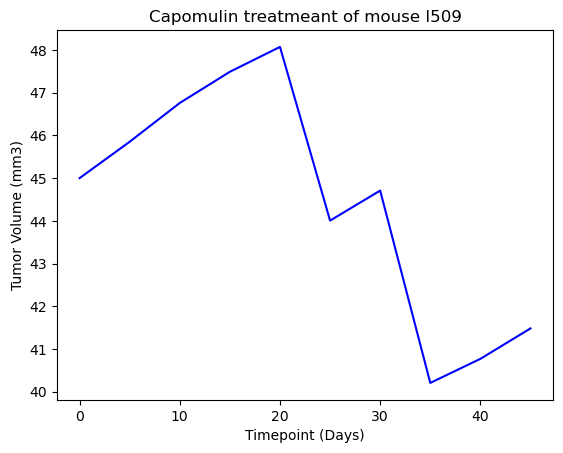

In [125]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_line_df = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]
x_axis = tumor_line_df["Timepoint"]
tumor_sz = tumor_line_df["Tumor Volume (mm3)"]

#fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_sz, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


/var/folders/hq/417ksjz55t33yv_l6fw4xsfw0000gp/T/ipykernel_39561/2508625785.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg_tumor_volume = capomulin_data.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

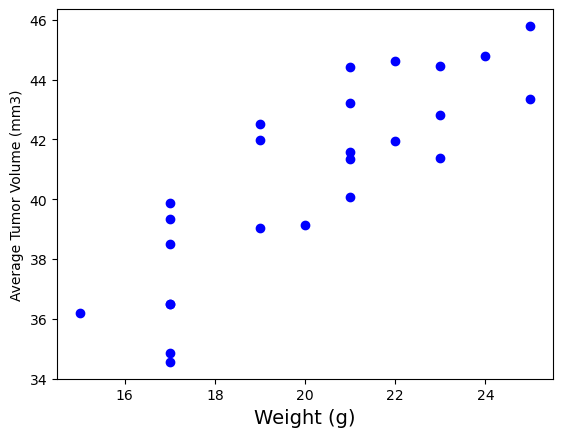

In [126]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
capomulin_avg_tumor_volume = capomulin_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'],capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color="blue")
#plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


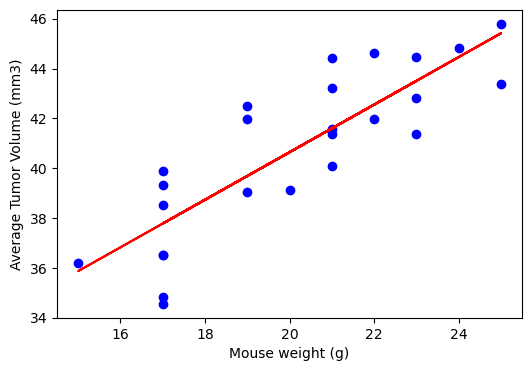

In [127]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(capomulin_avg_tumor_volume['Weight (g)'],capomulin_avg_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = capomulin_avg_tumor_volume['Weight (g)']
y_values = capomulin_avg_tumor_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_regress = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_regress)

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regression_values,"r-")
#plt.title("Linear Regression Equation", fontsize=20)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#plt.annotate(line_regress, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", color="red")

#plt.savefig("./Images/corr_avg_tumor_vol_and_weight_scatterplot.png", bbox_inches = "tight")
plt.show()
